In [4]:
import pandas as pd
import numpy as np
#%display typeset

In [63]:
def ODE (t,y,params):
    S,E,I,A,R,D = y
    lam,alfa,p,theta,gama,mu = params
    return [-lam*S*I,
            lam*S*I - alfa*E,
            (1-p)*alfa*E - gama*I - mu*I,
            p*alfa*E - theta*A,
            gama*I + theta*A,
            mu*I ]

In [82]:
lam = 0.3
gama = 0.04
theta = 0.04
alfa =  0.35
mu = 0.02
p = 0.5

In [86]:
T = ode_solver()
T.function = ODE
T.algorithm='rk8pd'
inits = [.99, 0,.01, 0, 0, 0]
tspan = [0,250]
T.ode_solve(tspan, inits, num_points=250,
            params=[lam,alfa,p,theta,gama,mu])

In [87]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[9.90000000e-01, 0.00000000e+00, 1.00000000e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.87098646e-01, 2.44523177e-03, 9.64106839e-03, 2.24953367e-04,
        3.94436105e-04, 1.95664216e-04],
       [9.84254047e-01, 4.12312159e-03, 9.64723543e-03, 7.88930883e-04,
        7.98605111e-04, 3.88060112e-04],
       ...,
       [1.02450747e-01, 1.04794289e-05, 1.04830912e-04, 5.65092823e-04,
        7.45647331e-01, 1.51221519e-01],
       [1.02447592e-01, 1.00429837e-05, 1.00468303e-04, 5.44694972e-04,
        7.45673630e-01, 1.51223571e-01],
       [1.02444569e-01, 9.62472348e-06, 9.62871909e-05, 5.25023644e-04,
        7.45698957e-01, 1.51225539e-01]])

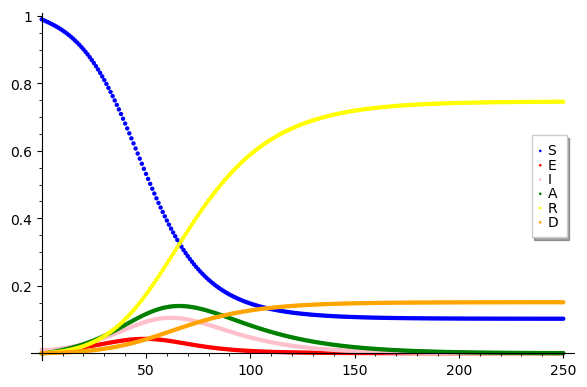

In [88]:
popFRA = 65e6
def plot_sol(sol):
    sim = get_sim_array(sol)
    P = list_plot(sim[:,0],legend_label='S')
    colors = ['blue','red','pink','green','yellow','orange','black','purple']
    for i,var in enumerate(['E','I','A','R','D']):
        P += list_plot(sim[:,i+1],color=colors[i+1],legend_label=var)
   
    show(P)
plot_sol(T.solution)

In [5]:
data = pd.read_csv("owid-covid-data.csv")
data = data[data.iso_code=="FRA"]
data = data[data.date>='2020-01-24']
data.reset_index(inplace=True)

In [61]:
data

,index,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,13445,FRA,Europe,France,2020-01-24,0.0,0.0,0.000,0.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
1,13446,FRA,Europe,France,2020-01-25,3.0,3.0,0.429,0.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
2,13447,FRA,Europe,France,2020-01-26,3.0,0.0,0.429,0.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
3,13448,FRA,Europe,France,2020-01-27,3.0,0.0,0.429,0.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
4,13449,FRA,Europe,France,2020-01-28,3.0,0.0,0.429,0.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,13666,FRA,Europe,France,2020-09-01,281025.0,3082.0,5167.286,30635.0,29.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
222,13667,FRA,Europe,France,2020-09-02,286007.0,4982.0,5407.000,30661.0,26.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
223,13668,FRA,Europe,France,2020-09-03,293024.0,7017.0,5633.857,30686.0,25.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66
224,13669,FRA,Europe,France,2020-09-04,300181.0,7157.0,5783.286,30686.0,0.0,...,13.079,38605.671,NaN,86.06,4.77,30.1,35.6,NaN,5.98,82.66


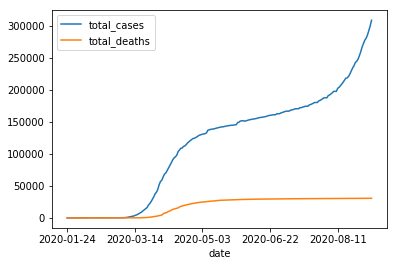

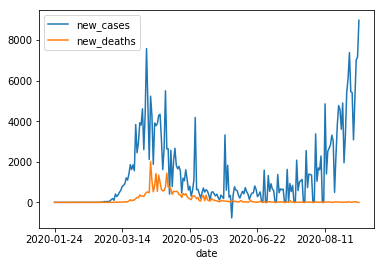

In [62]:
subnot=1
a =data.set_index('date')[['total_cases','total_deaths']].plot()
data.set_index('date')[['new_cases','new_deaths']].plot()